In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Reading the dataset

In [3]:
df = pd.read_csv('swiggydataset.csv')

In [4]:
# Data Preprocessing

In [5]:
df.isna().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [6]:
df.full_text[0]

'@Mahi_2510 @swiggy_in The ultimate answer will b sorry ... They assure that ...'

In [7]:
text = []
for i in df.full_text:
    text.append(i.lower())

In [8]:
text[0]

'@mahi_2510 @swiggy_in the ultimate answer will b sorry ... they assure that ...'

In [9]:
text2 = []
for i in range(len(text)):
    temp = re.sub(r'https://\S+|www\.\S+','',text[i])
    temp1 = re.sub(r'\d+','',temp)
    temp2 = re.sub(r'[^\x00-\x7F]+', '', temp1)  # Access individual element using index 'i'
    temp3 = re.sub(r'\n', '', temp2)  # Use the cleaned version 'temp' for further cleaning
    if (len(temp3)==1) | (len(temp3)==0):
        continue
    else:
        text2.append(temp3.replace('  ',' ').strip())

In [10]:
text2

['@mahi_ @swiggy_in the ultimate answer will b sorry ... they assure that ...',
 '@swiggycares i hope so.',
 '@swiggycares i think you have the order details, was the number present there? if yea you can call right now.',
 '@swiggy_in people are complaining here also, i know you are little disappointed by service, but for that you have customer service center or you can make direct messages, it is not necessary that every time everything is perfect, sometimes mistakes happen',
 "@swiggycares do you even know the meaning of your tagline, dm's won't work. i want explanation here.",
 'nothing new, they had the most shittiest associates. you can expect these things from them on regular basis. @swiggy_in lets see how it goes.',
 '@swiggy_in @swiggycares i am the owner of the restaurant named daana paani() area manager- abdul i am facing many difficulties and your staff is the most incapable staff including area manager i would like to terminate the partnership because of y',
 '@swiggycares 

In [11]:
text3=[]
for i in range(len(text2)):
    text3.append(text2[i].translate(str.maketrans('','',string.punctuation)))

In [12]:
text3

['mahi swiggyin the ultimate answer will b sorry  they assure that ',
 'swiggycares i hope so',
 'swiggycares i think you have the order details was the number present there if yea you can call right now',
 'swiggyin people are complaining here also i know you are little disappointed by service but for that you have customer service center or you can make direct messages it is not necessary that every time everything is perfect sometimes mistakes happen',
 'swiggycares do you even know the meaning of your tagline dms wont work i want explanation here',
 'nothing new they had the most shittiest associates you can expect these things from them on regular basis swiggyin lets see how it goes',
 'swiggyin swiggycares i am the owner of the restaurant named daana paani area manager abdul i am facing many difficulties and your staff is the most incapable staff including area manager i would like to terminate the partnership because of y',
 'swiggycares inbox check kare huzoor',
 'swiggycares p

In [13]:
text4 = []
for i in range(len(text3)):
    temp = []
    for j in text3[i].split():
        if len(j.strip()) == 1:
            continue
        else:
            temp.append(j)
    text4.append(' '.join(temp))

In [14]:
text4

['mahi swiggyin the ultimate answer will sorry they assure that',
 'swiggycares hope so',
 'swiggycares think you have the order details was the number present there if yea you can call right now',
 'swiggyin people are complaining here also know you are little disappointed by service but for that you have customer service center or you can make direct messages it is not necessary that every time everything is perfect sometimes mistakes happen',
 'swiggycares do you even know the meaning of your tagline dms wont work want explanation here',
 'nothing new they had the most shittiest associates you can expect these things from them on regular basis swiggyin lets see how it goes',
 'swiggyin swiggycares am the owner of the restaurant named daana paani area manager abdul am facing many difficulties and your staff is the most incapable staff including area manager would like to terminate the partnership because of',
 'swiggycares inbox check kare huzoor',
 'swiggycares pls go through the de

In [15]:
positive = 0
negative = 0
neutral = 0
pos_tweet = []
neg_tweet = []
neu_tweet = []
for i in text4:
    score = SentimentIntensityAnalyzer().polarity_scores(i)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    if pos > neg:
        pos_tweet.append(i)
        positive+=1
    elif neg > pos:
        neg_tweet.append(i)
        negative+=1
    elif neg == pos:
        neutral+=1
        neu_tweet.append(i)

In [16]:
def percentage(no,total):
    return round(100*(no/total),2)

In [17]:
print('percentage of Positive tweets',percentage(positive, len(text4)),'%')
print('percentage of Negative tweets',percentage(negative, len(text4)),'%')
print('percentage of Neutral tweets',percentage(neutral, len(text4)),'%')

percentage of Positive tweets 39.74 %
percentage of Negative tweets 39.83 %
percentage of Neutral tweets 20.43 %


In [18]:
pos_tweet

['mahi swiggyin the ultimate answer will sorry they assure that',
 'swiggycares hope so',
 'swiggycares think you have the order details was the number present there if yea you can call right now',
 'swiggycares pls go through the details and solve this asap delivery boys number is switched off pls share explanation here let the world know what swiggy cares about',
 'hope you hire educated professionals swiggyin pls read pur chat thread and put an end to this asap',
 'well this order is not delivered delivery persons number switched off world class service by swiggyin they really care',
 'their associate showing off his cannedtemplates swiggycares if sumone is ordering food at clock you need to understand the trust we have on you guys you guys will get the details by this number',
 'swiggycares wow swiggy is making jok of their customers',
 'swiggyin they called me bagger what genuine customer care hiring',
 'swiggycares and your customer care is equally clueless',
 'swiggycares your a

In [19]:
neg_tweet

['swiggyin people are complaining here also know you are little disappointed by service but for that you have customer service center or you can make direct messages it is not necessary that every time everything is perfect sometimes mistakes happen',
 'swiggycares do you even know the meaning of your tagline dms wont work want explanation here',
 'nothing new they had the most shittiest associates you can expect these things from them on regular basis swiggyin lets see how it goes',
 'swiggyin swiggycares am the owner of the restaurant named daana paani area manager abdul am facing many difficulties and your staff is the most incapable staff including area manager would like to terminate the partnership because of',
 'swiggycares swiggyin dont know why swiggy is getting worst day by day there was time when swiggy was known to their services last order was delivered after hours and now my food packagimg was spoiled aslo shared the same with theier chat',
 'th time in row swiggyin deliv

In [20]:
pos_label = [2 for i in range (len(pos_tweet))]
neu_label = [1 for i in range (len(neu_tweet))]
neg_label = [0 for i in range (len(neg_tweet))]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
pos_label = [2 for i in range (len(pos_tweet))]
neu_label = [1 for i in range (len(neu_tweet))]
neg_label = [0 for i in range (len(neg_tweet))]

In [23]:
class_label = pos_label.copy()
class_label.extend(neu_label)
class_label.extend(neg_label)

In [24]:
tweet = pos_tweet.copy()
tweet.extend(neu_tweet)
tweet.extend(neg_tweet)

In [25]:
df_final = pd.DataFrame(columns=['tweet','label'],index=range(len(text4)))
df_final['tweet'] = tweet
df_final['label'] = class_label

In [26]:
df_final

,tweet,label
0,mahi swiggyin the ultimate answer will sorry t...,2
1,swiggycares hope so,2
2,swiggycares think you have the order details w...,2
3,swiggycares pls go through the details and sol...,2
4,hope you hire educated professionals swiggyin ...,2
...,...,...
16707,swiggycares dont reply me frustrating service ...,0
16708,both of you dominos and swiggyin making fool m...,0
16709,swiggyin swiggycares order no terrible food wi...,0
16710,omnitztours roadsofmumbai swiggyin mumbaipolic...,0


In [27]:
df_final = df_final.sample(frac=1.0,random_state=45)
df_final.reset_index(drop=True,inplace=True)
df_final.label.value_counts()

label
0    6656
2    6641
1    3415
Name: count, dtype: int64

In [28]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
for i, j in zip(df_final.tweet,range(df_final.shape[0])):
    temp = []
    for k in i.split():
        temp.append(SnowballStemmer(language='english').stem(k))
    df_final.loc[j,'tweet'] =' '.join(temp)

In [30]:
df_final

,tweet,label
0,swiggycar veri bad and veri disappoint have re...,0
1,swiggycar final the order has been cancel at a...,2
2,swiggycar it happen nd time with me and now th...,0
3,swiggyin rahuljaimini nandanreddi fssaiindia h...,1
4,maulanapak smokingskil ssr swiggyin chew gum t...,1
...,...,...
16707,swiggycar befor provid such bad qualiti food a...,0
16708,smokingskil theshaktiroopa swiggyin this isnt ...,0
16709,swiggyin swiggycar you are bunch of lie receiv...,0
16710,swiggycar kind send the detail asap,2


In [31]:
df_final.shape

(16712, 2)

## Converting the Words to Vector using Bag of words/Count vectorization

In [33]:
cv = CountVectorizer(max_features=1000)
cv.fit(df_final.tweet)

CountVectorizer(max_features=1000)

In [34]:
sparse_matrix = cv.transform(df_final['tweet'])
sparse_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [49]:
x_train,x_test,y_train,y_test = train_test_split(sparse_matrix,df_final['label'], test_size=0.25,random_state= 49)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logimodel = LogisticRegression(max_iter=1000)
logimodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
pred_train = logimodel.predict(x_train)
pred_test = logimodel.predict(x_test)

In [54]:
print('Accurracy train data',accuracy_score(y_train,pred_train)*100)

Accurracy train data 86.97941598851125


In [55]:
print('Accurracy test data',accuracy_score(y_test,pred_test)*100)

Accurracy test data 80.63666826232647


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
pred_train = rfc.predict(x_train)
pred_test = rfc.predict(x_test)

In [47]:
print('Accurracy train data',accuracy_score(y_train,pred_train)*100)

Accurracy train data 99.82796020644776


In [48]:
print('Accurracy test data',accuracy_score(y_test,pred_test)*100)

Accurracy test data 74.18486389470536


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(pred_test,y_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1548
           1       0.88      0.79      0.83       954
           2       0.81      0.80      0.80      1676

    accuracy                           0.81      4178
   macro avg       0.82      0.80      0.81      4178
weighted avg       0.81      0.81      0.81      4178



### Support Vector Machine 

In [63]:
from sklearn.svm import LinearSVC

In [65]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

C:\Users\anjan\anaconda3\envs\dl\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\anjan\anaconda3\envs\dl\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [75]:
pred_train =SVCmodel.predict(x_train)
pred_test = SVCmodel.predict(x_test)

In [76]:
print('Accurracy train data',accuracy_score(y_train,pred_train)*100)
print('Accurracy test data',accuracy_score(y_test,pred_test)*100)

Accurracy train data 87.00335088559119
Accurracy test data 81.13930110100527


### Naive Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [79]:
pred_train =nb.predict(x_train)
pred_test = nb.predict(x_test)

In [80]:
print('Accurracy train data',accuracy_score(y_train,pred_train)*100)
print('Accurracy test data',accuracy_score(y_test,pred_test)*100)

Accurracy train data 76.00925482687092
Accurracy test data 72.5466730493059


In [81]:
### XGboost

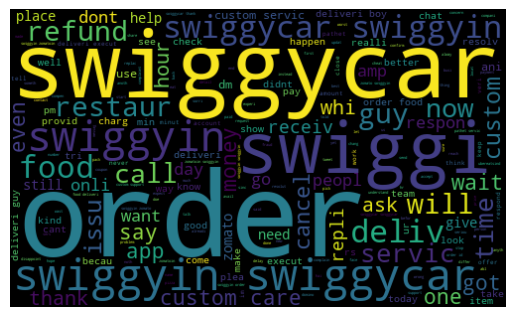

In [43]:
#picturing the most used words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Plot The Word Cloud
allWords=" ".join([twts for twts in df_final['tweet']] )
wordCloud = WordCloud(width =500, height=300, random_state=21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()